# Demographic Instance Timestamping Demo

Note: Make sure to manually upload model, labels and scene

In [ ]:
!pip install opencv-python # Install opencv-python

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow

from base64 import b64decode
from keras.models import load_model
import cv2
import numpy as np

# Load the model
model = load_model("race_detection_model.h5", compile=False) #DOUBLE-CHECK and EDIT THE PATH OF THE MODEL
class_names = open("labels.txt", "r").readlines() #DOUBLE-CHECK andEDIT THE PATH OF THE LABELS

def classify_image(image_data):
    if image_data is None or len(image_data) == 0:
        return None, None  # or appropriate default values

    nparr = np.frombuffer(image_data, np.uint8)
    image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    if image is None or image.size == 0:
        return None, None  # or appropriate default values

    # Preprocess the image
    image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
    image = np.asarray(image, dtype=np.float32).reshape(1, 224, 224, 3)
    image = (image / 127.5) - 1

    # Model prediction
    prediction = model.predict(image)
    index = np.argmax(prediction)
    class_name = class_names[index].strip()
    confidence_score = np.round(prediction[0][index] * 100, 2)

    return class_name, confidence_score


Desired Class: african_american_and_caucasian

===== Frame-by-Frame Race Classification =====

1/1 [==============================] - 0s 36ms/step


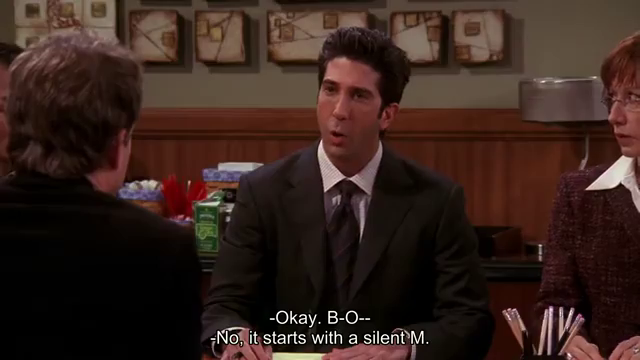

Class: 0 african_american, Confidence: 80.68%
1/1 [==============================] - 0s 38ms/step


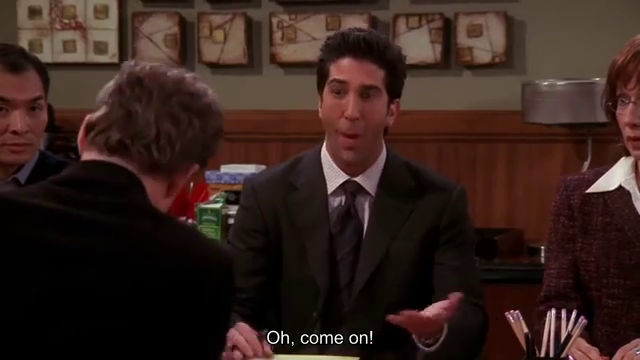

Class: 0 african_american, Confidence: 57.17%
1/1 [==============================] - 0s 35ms/step


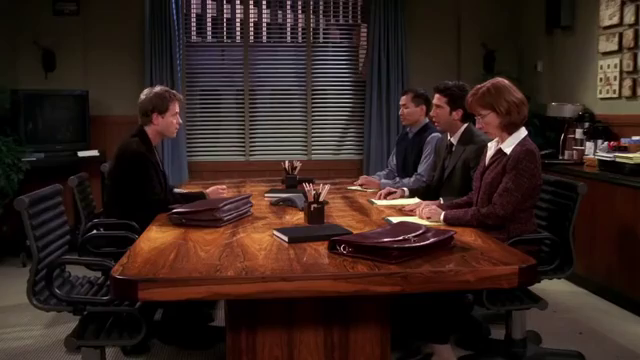

Class: 0 african_american, Confidence: 73.37%
1/1 [==============================] - 0s 52ms/step


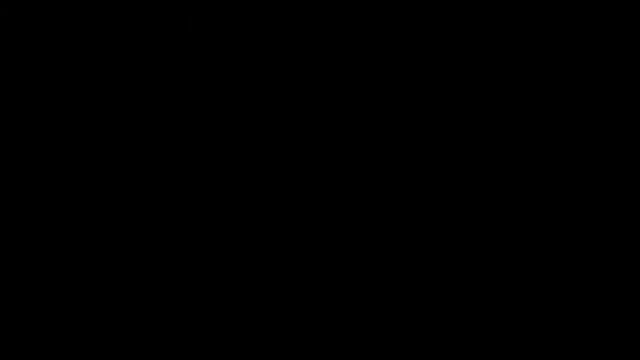

Class: 1 caucasian, Confidence: 69.18%
1/1 [==============================] - 0s 45ms/step


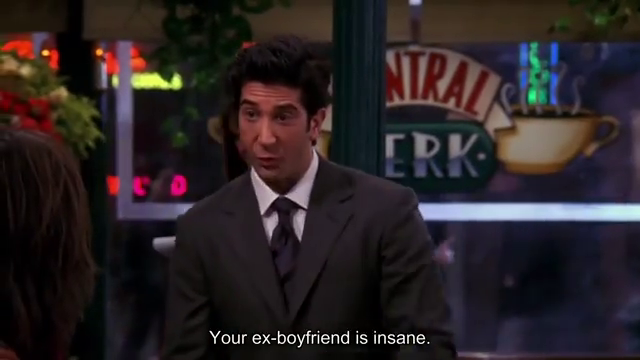

Class: 0 african_american, Confidence: 98.06%
1/1 [==============================] - 0s 48ms/step


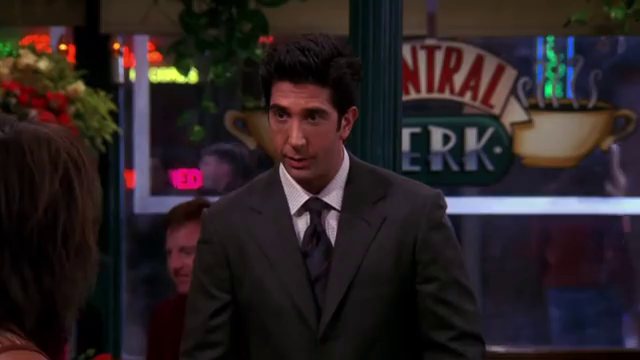

Class: 0 african_american, Confidence: 98.09%
1/1 [==============================] - 0s 37ms/step


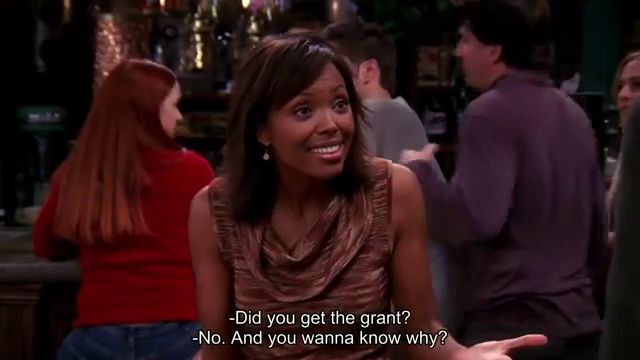

Class: 0 african_american, Confidence: 57.7%
1/1 [==============================] - 0s 34ms/step


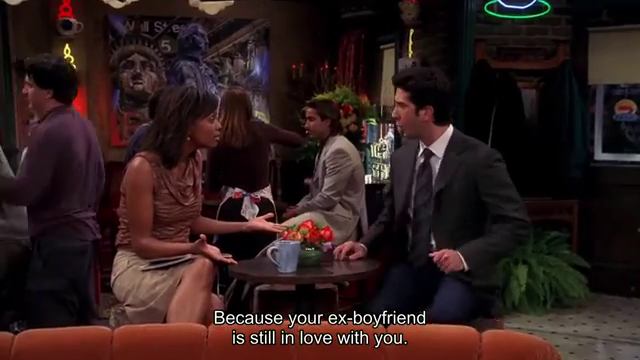

Class: 2 african_american_and_caucasian, Confidence: 50.59%
1/1 [==============================] - 0s 35ms/step


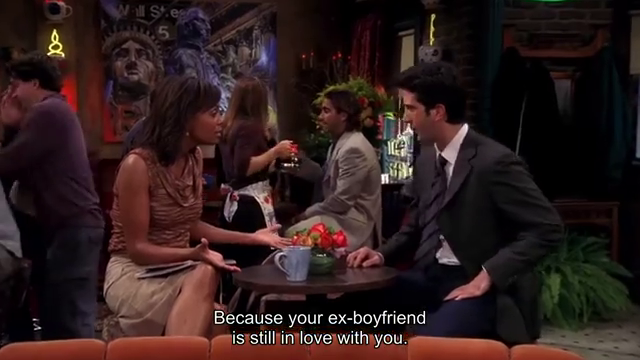

Class: 2 african_american_and_caucasian, Confidence: 82.22%
Desired Class: african_american_and_caucasian


Timestamps of Desired Class:
['00:00:18']


In [ ]:
# Function to process the video
desired_class = "african_american_and_caucasian"
def process_video(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    fps = cap.get(cv2.CAP_PROP_FPS)  # Frame rate of the video

    timestamps = []

    print("Desired Class: " + desired_class + "\n")
    print("===== Frame-by-Frame Race Classification =====\n")
    count = 0
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        # Skip frames for sake of keeping demo timely
        count += 1
        # print(count)
        if count % 50 != 0:
          continue

        # Encode the frame as PNG in memory
        is_success, buffer = cv2.imencode(".png", frame)
        if not is_success:
            continue

        # The frame is now encoded as PNG in the 'buffer'
        # You can now pass this buffer to your classify_image function
        class_name, confidence_score = classify_image(buffer.tobytes())

        # Preview every 50 frames and classifications
        if count % 50 == 0:
          cv2_imshow(frame)
          print(f"Class: {class_name}, Confidence: {confidence_score}%")

        # Example: Check if any objects were detected (customize this part)
        if desired_class in class_name and confidence_score > 80:
                # Calculate the timestamp
                frame_number = cap.get(cv2.CAP_PROP_POS_FRAMES)
                timestamp = frame_number / fps
                timestamps.append(timestamp)

    cap.release()
    return timestamps

video_path = 'friends_test_scene_short.mp4'
timestamps = process_video(video_path)

# Convert timestamps to a readable format (e.g., HH:MM:SS)
formatted_timestamps = [str(int(t // 3600)).zfill(2) + ':' + str(int(t % 3600 // 60)).zfill(2) + ':' + str(int(t % 60)).zfill(2) for t in timestamps]
print("Desired Class: " + desired_class + "\n")
print("\nTimestamps of Desired Class:")
print(formatted_timestamps)
